# PRÁCTICA DE PROGRAMACIÓN DE ALGORITMOS

### Iñigo Gómez Carvajal y Jon Zorrilla Gamboa

En primer lugar, importamos las librerías necesarias además del módulo donde tenemos las funciones.

In [1]:
import numpy as np
import pandas as pd
from funciones import *
import matplotlib.pyplot as plt

Ahora, definiremos la función y su derivada para hallar los mínimos en una zona determinada.

In [2]:
def f(x):
    return x**2 + 3*x

In [3]:
def fp(x):
    return 2*x + 3

Ahora, representaremos la función en $x \in [-3,3]$ para saber como es la función. Además, sabemos que el mínimo de esta función está en $x = -1.5$, con un valor $f(x) = -2.25$.

<function matplotlib.pyplot.sca(ax)>

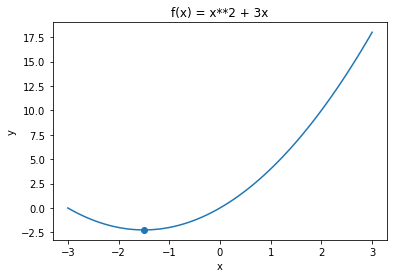

In [4]:
x = np.linspace(-3, 3, 100)
plt.title("f(x) = x**2 + 3x")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, f(x))
plt.scatter(-1.5, f(-1.5), marker = "o")
plt.sca

Ahora, calcularemos los mínimos siguiendo los métodos implementados:

#### Algoritmo de búsqueda Dicotómica:

El algoritmo de búsqueda dicotómica funciona para funciones estrictamente cuasiconvexas en un intervalo $[a, b]$. Se itera teniendo en cuenta los extremos de este intervalo para reducirlo hasta una precisión deseada. Por último, se obtiene un par de números donde cada valor es el más cercano al mínimo de la función teniendo en cuenta la precisión, por cada uno de los lados. 

In [5]:
min = sum(busqueda_dicotomica(f, -3, 3, niter = 1000, l = 0.01, eps = 0.001))/2
print(min)

El mínimo está entre -1.5063574218749998 y -1.4985000000000002, con n = 10 iteraciones
-1.5024287109375


Como obtenemos una tupla de números, consideraremos el punto medio entre estos dos como el mínimo de la función, para poder representarlo con mayor facilidad. 

En este caso, hemos fijado una precisión $l = 0.01$ y ha llegado en 10 iteraciones. Pero si queremos reducir la precisión un orden, el número de iteraciones crece exponencialmente, por lo que podemos confirmar que no es un método muy eficaz.

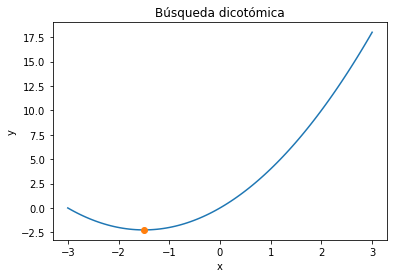

In [6]:
plt.title("Búsqueda dicotómica")
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(min, f(min), marker = "o")

#### Algoritmo de búsqueda de la Sección Áurea.

El algoritmo de sección áurea tiene un funcionamiento similar al previo, pues vale para funciones estrictamente pseudoconvexas en un intervalo $[a, b]$. Lo único que cambia es el algoritmo, pues también devuelve un par de valores cercanos al mínimo dada una precisión; uno por la izquierda y otro por la derecha.

In [7]:
min = sum(seccion_aurea(f, -3, 3, niter = 1000, l = 0.0001))/2
print(min)

El mínimo está entre -1.5000810271116902 y -1.499984274416856, con n = 15 iteraciones
-1.5000326507642732


En este caso, debemos hacer lo mismo, ya que obtenemos como resultado dos puntos. Como se puede observar, se ha conseguido un resultado con una precisión dos órdenes superior mayor con únicamente 5 iteraciones más.

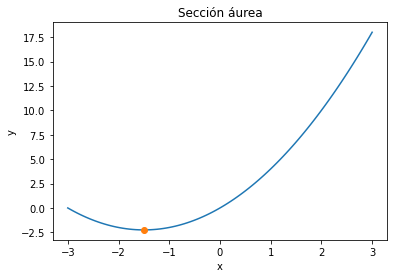

In [8]:
plt.title("Sección áurea")
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(min, f(min), marker = "o")

#### Algoritmo del gradiente

El algoritmo del gradiente hace uso de la función y su derivada para hallar el mínimo, pues itera en búsqueda del mínimo de la función teniendo en cuenta la pendiente en cada punto.

In [9]:
min = gradiente(f, fp, x0 = 0, niter=1000, prec = 0.0001, lambd=0.1)
print(min)

El mínimo de la función se encuentra en -1.4999581861027527, con un valor -2.2499999982515986 y n = 47 iteraciones
-1.4999581861027527


En este caso, se aproximará únicamente a un punto según la precisión indicada, donde hemos iniciado en $x_0=0$.

Como podemos observar, hemos obtenido la misma precisión que en el método anterior pero hemos necesitado 3 veces el número de iteraciones. Esto se ha conseguido con $\lambda = 0.1$, pero si se cambia este valor, se puede mejorar la convergencia de este método. Por ejemplo, para $\lambda = 0.5$ se consigue la convergencia deseada en un único paso. Esto depende de la naturaleza de la propia función y del punto de partida.

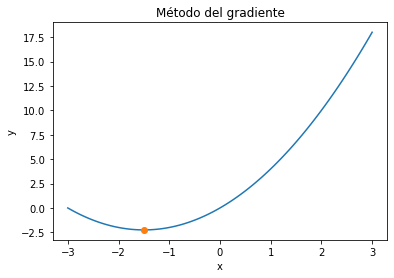

In [10]:
plt.title("Método del gradiente")
plt.plot(x, f(x))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(min, f(min), marker = "o")

#### Método de Newton

El método de Newton multivariante itera en direcciones de máximo descenso, premultiplicándolos por la matriz hessiana, y haciendo uso del gradiente de la función. 

Definimos la siguiente función:

In [11]:
def f2(x):
    return (x[0] - 2)**2 + (x[1] - 2)**2

En este caso, como estamos empleando el método de Newton multivariante, debemos definir una función que conste de dos variables, $x[0] \equiv x$ y $x[1] \equiv y$. En este caso, dibujaremos un paraboloide, pues es fácil de interpretar. En este caso, es evidente que el mínimo ocurre en $(x,y) = (2,2)$.

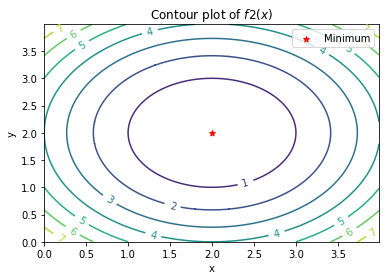

In [12]:
x0, x1 = 0, 4
y0, y1 = 0, 4
x = np.arange(x0, x1, 0.01)
y = np.arange(y0, y1, 0.01)
xx, yy = np.meshgrid(x, y)
z = f2([xx, yy])

cont = plt.contour(x, y, z, levels=8)
plt.title(r"Contour plot of $f2(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(cont, inline=True, fontsize=10)
plt.scatter(2, 2, color="red", marker="*", label="Minimum")
plt.legend()
plt.show()

Para el algoritmo de Newton multivariante debemos calcular el gradiente y el hessiano de la función. En este caso, es sencillo:

$$\nabla f(x,y) = \left( \frac{\partial f}{\partial x} , \frac{\partial f}{\partial y} \right) = \left ( 2(x - 2) , 2(y - 2) \right )$$

$$Hf(x,y) = \begin{pmatrix} 2 & 0 \\
                         0 & 2 \end{pmatrix}$$

In [13]:
def gf(x):
    return np.array([
        2*(x[0] - 2) , 2*(x[1] - 2)])

def hf(x):
    return np.array([[2, 0], [0, 2]])

In [14]:
x0 = np.array([0,0])
minimum = newton(gf, hf, x0, lr = 0.8, eps = 0.0001, max_iter=1000)
print(minimum)

Convergencia en iteración: 7
[1.99999488 1.99999488]


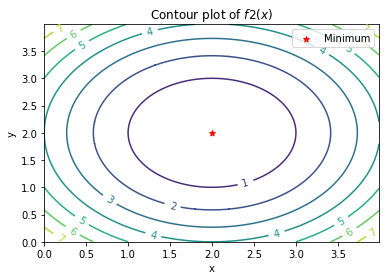

In [15]:
cont = plt.contour(x, y, z, levels=8)
plt.title(r"Contour plot of $f2(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(cont, inline=True, fontsize=10)
plt.scatter(minimum[0], minimum[1], color="red", marker="*", label="Minimum")
plt.legend()
plt.show()

Como podemos ver, el método de Newton es muy rápido, pues consigue una precisión del orden de $10^{-4}$ en tan solo 7 iteraciones. Por otro lado, es importante comentar que para implementar este método, es necesario del conocimiento del gradiente y del hessiano de la función, los cuales a veces son difíciles de calcular.

#### Método de Fletcher-Reeves

Para la implementación del método Fletcher-Reeves, hemos usado la siguiente referencia https://indrag49.github.io/Numerical-Optimization/conjugate-gradient-methods-1.html. En este caso, el algoritmo llama a la función `linesearch_secant`, la cual hace uso del método de la secante para iterar y hallar el mínimo.

In [16]:
x0 = np.array([0,0])
minimum = fletcher_reeves(x_0 = x0, grad = gf, eps=1e-3, max_iter=100, tol=1e-3)
print(minimum)

[2. 2.]


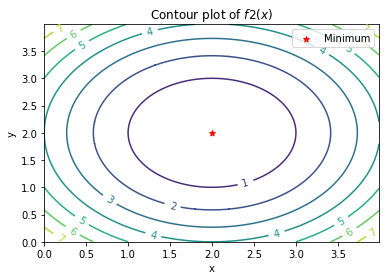

In [18]:
cont = plt.contour(x, y, z, levels=8)
plt.title(r"Contour plot of $f2(x)$")
plt.xlabel('x')
plt.ylabel('y')
plt.clabel(cont, inline=True, fontsize=10)
plt.scatter(minimum[0], minimum[1], color="red", marker="*", label="Minimum")
plt.legend()
plt.show()

Como podemos observar, también obtenemos el mínimo de la función de manera correcta.